In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
import pandas as pd
import seaborn as sns
import json
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np


C:\Users\Admin\AppData\Local\Temp\ipykernel_25068\139893409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=matches_df, palette="Set1")


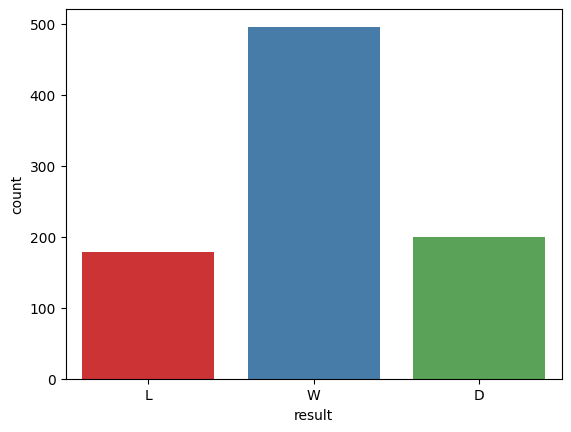

In [7]:
matches_df = pd.read_csv('data_rf.csv')
sns.countplot(x='result', data=matches_df, palette="Set1") 
matches_df.loc[matches_df["result"] == "W", "result"] = 0
matches_df.loc[matches_df["result"] == "L", "result"] = 1
matches_df.loc[matches_df["result"] == "D", "result"] = 2

In [8]:
X = matches_df.drop("result", axis=1)
y = matches_df["result"].astype("int")

In [9]:
# X là ma trận đặc trưng, y là vector nhãn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Xác định các cột phân loại và cột số
categorical_cols = ['venue_Away', 'venue_Home']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [13]:
# Xác định các cột phân loại và cột số
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Tạo ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ])

In [16]:
# Tiền xử lý dữ liệu
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [18]:
with open('best_params/best_params_RF.json', 'r') as f:
    best_params_RF = json.load(f)

# Khởi tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier(**best_params_RF.get("RF", {}), random_state=42)

# rf_classifier = RandomForestClassifier()
# Huấn luyện mô hình trên tập dữ liệu huấn luyện
rf_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(max_depth=100, max_features=0.6, min_samples_leaf=4,
                       min_samples_split=20, n_estimators=1200,
                       random_state=42)

In [19]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_model.predict(X_test_preprocessed)

In [29]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
y_test

797    0
319    0
382    0
790    1
422    0
      ..
211    0
693    0
81     0
770    1
684    0
Name: result, Length: 175, dtype: int32

In [32]:
y_pred_reshaped = y_pred.reshape(-1, 1)

In [36]:
y_pred_proba = rf_model.predict_proba(X_test_preprocessed)
y_pred_proba_1 = y_pred_proba[:, 1]

In [40]:
y_pred_proba_1 = y_pred_proba_1.reshape(-1, 1)

In [42]:
# Tính F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Tính AUC
# auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
# auc = roc_auc_score(y_test, y_pred_reshaped, multi_class='ovr')
# auc = roc_auc_score(y_test, y_pred_proba_1, multi_class='ovr')

print("F1 Score:", f1)
# print("AUC:", auc)

F1 Score: 0.41278578169578806
